In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import joblib

df = pd.read_csv("D://temperature.csv")

df.head()


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [14]:
print(df.isnull().sum())

print(df.dtypes)


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64
station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          

In [15]:
df.describe()


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


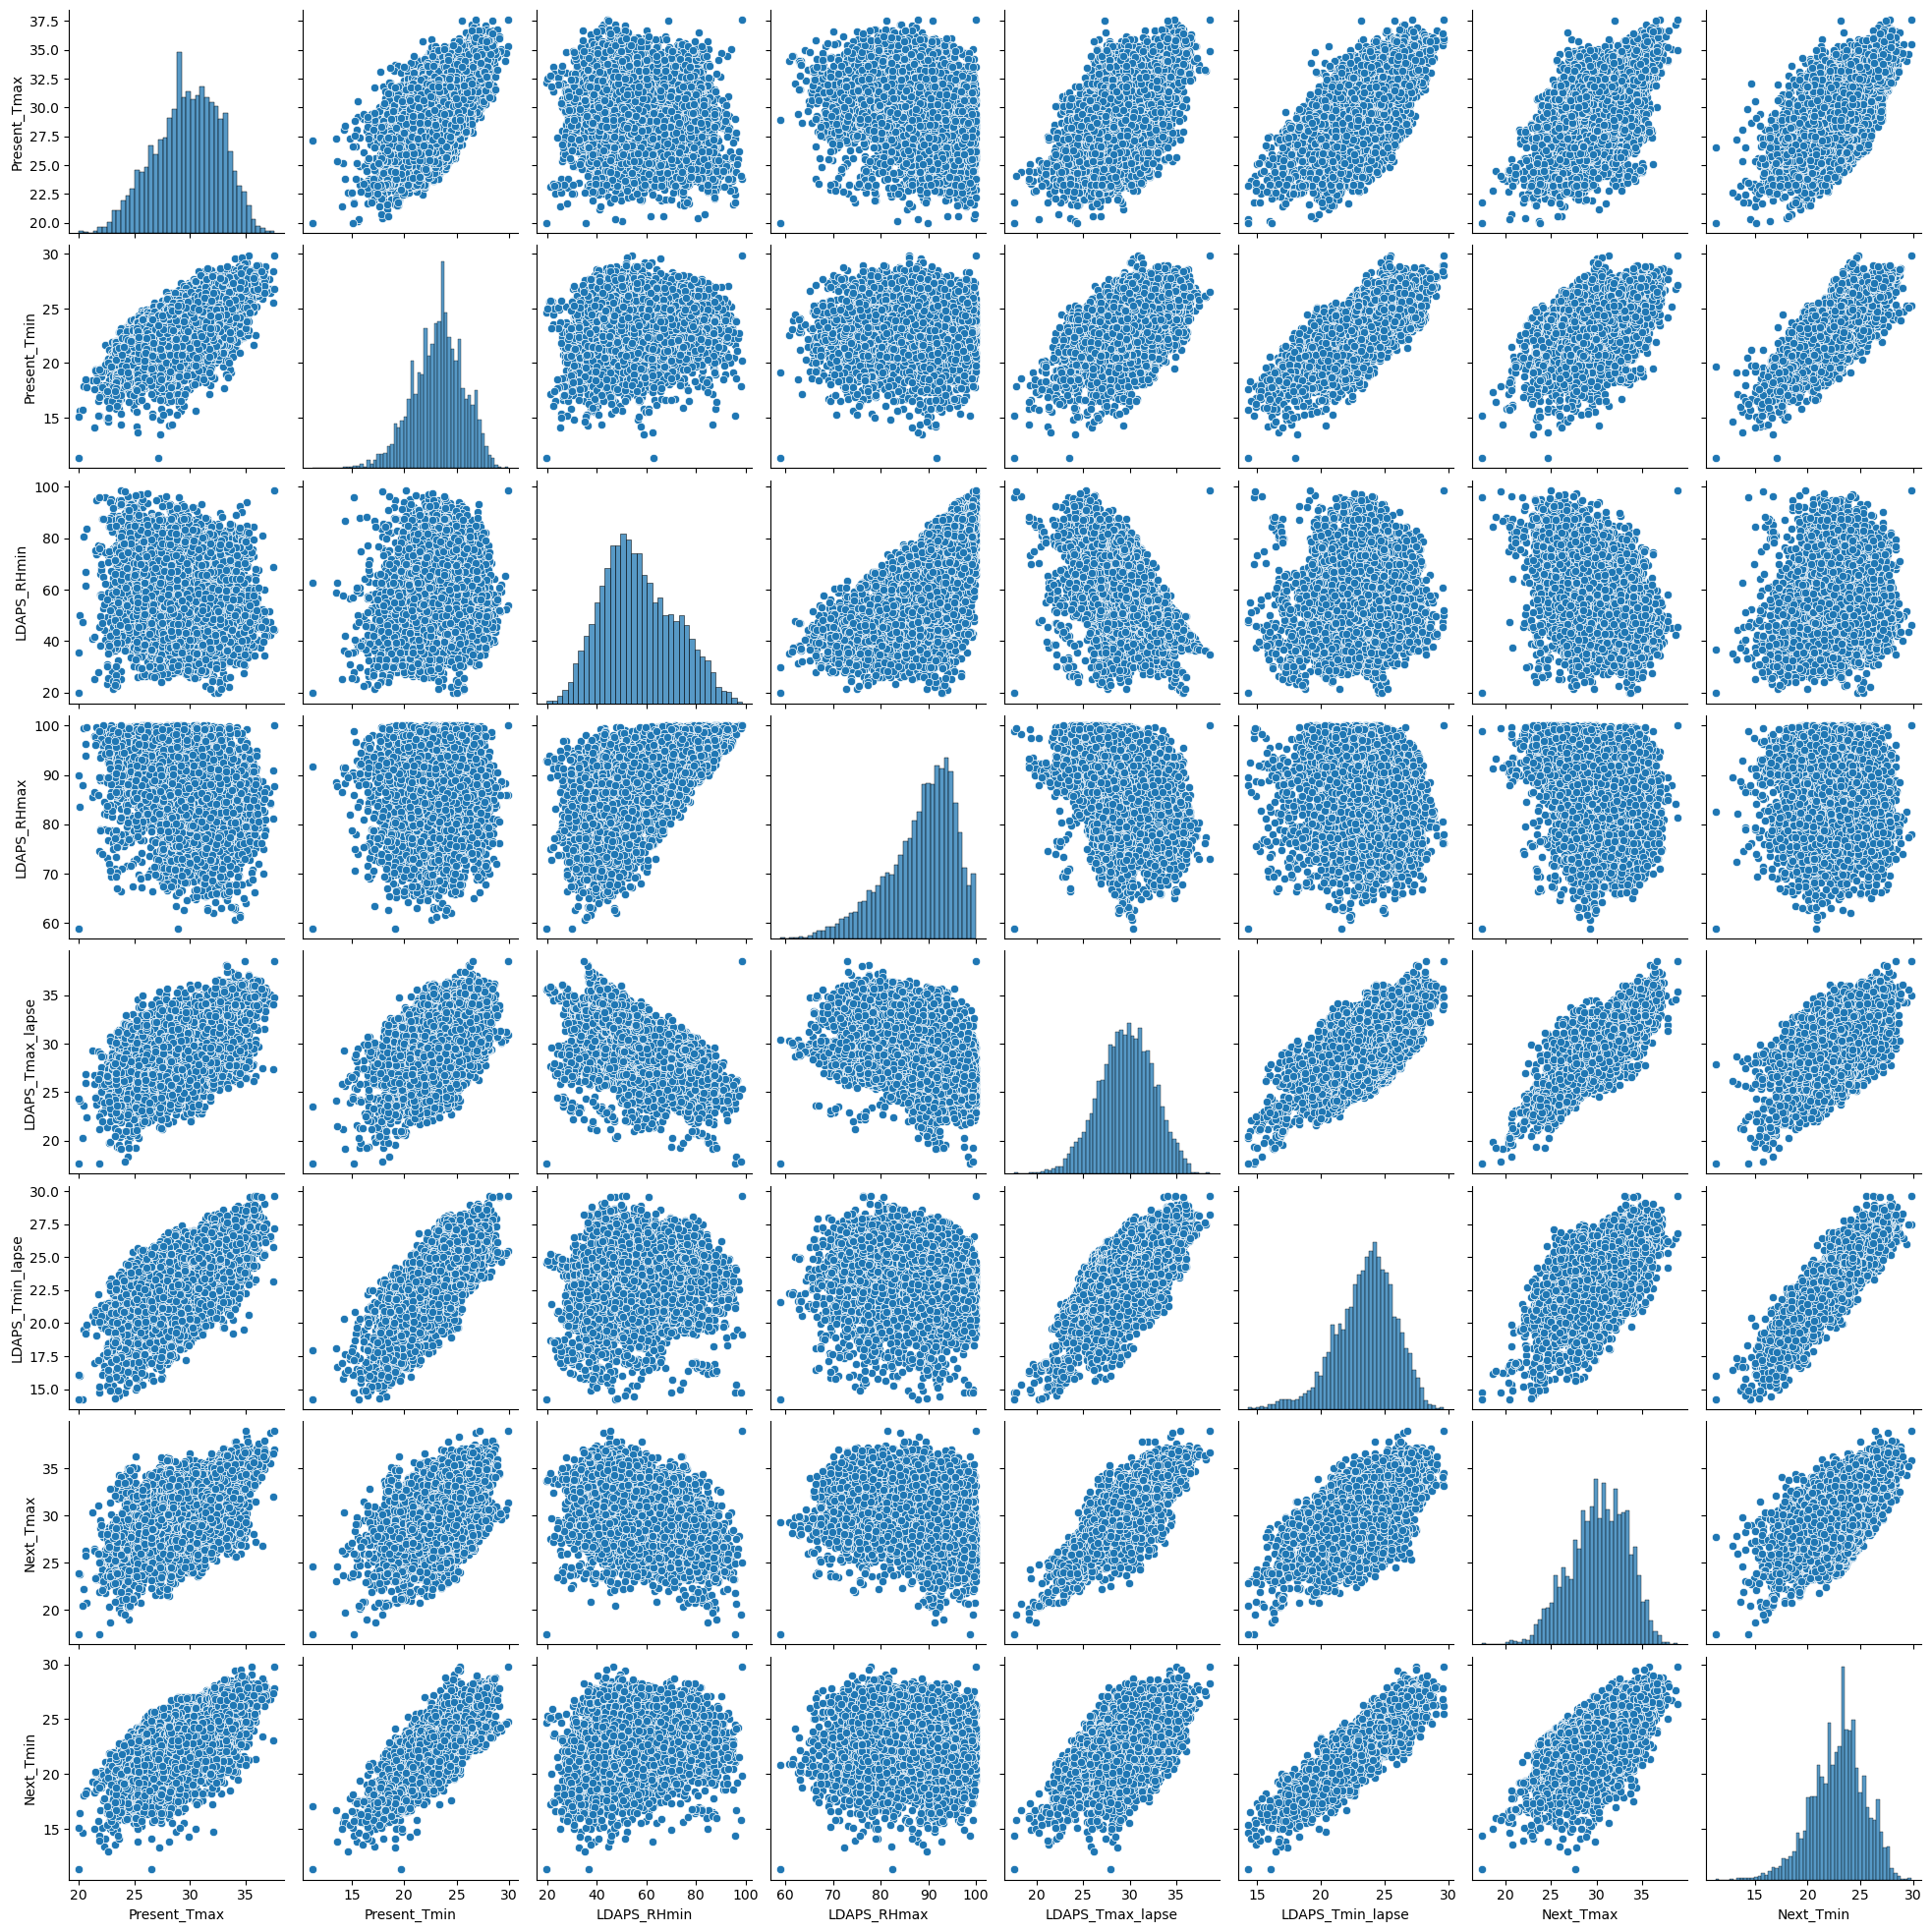

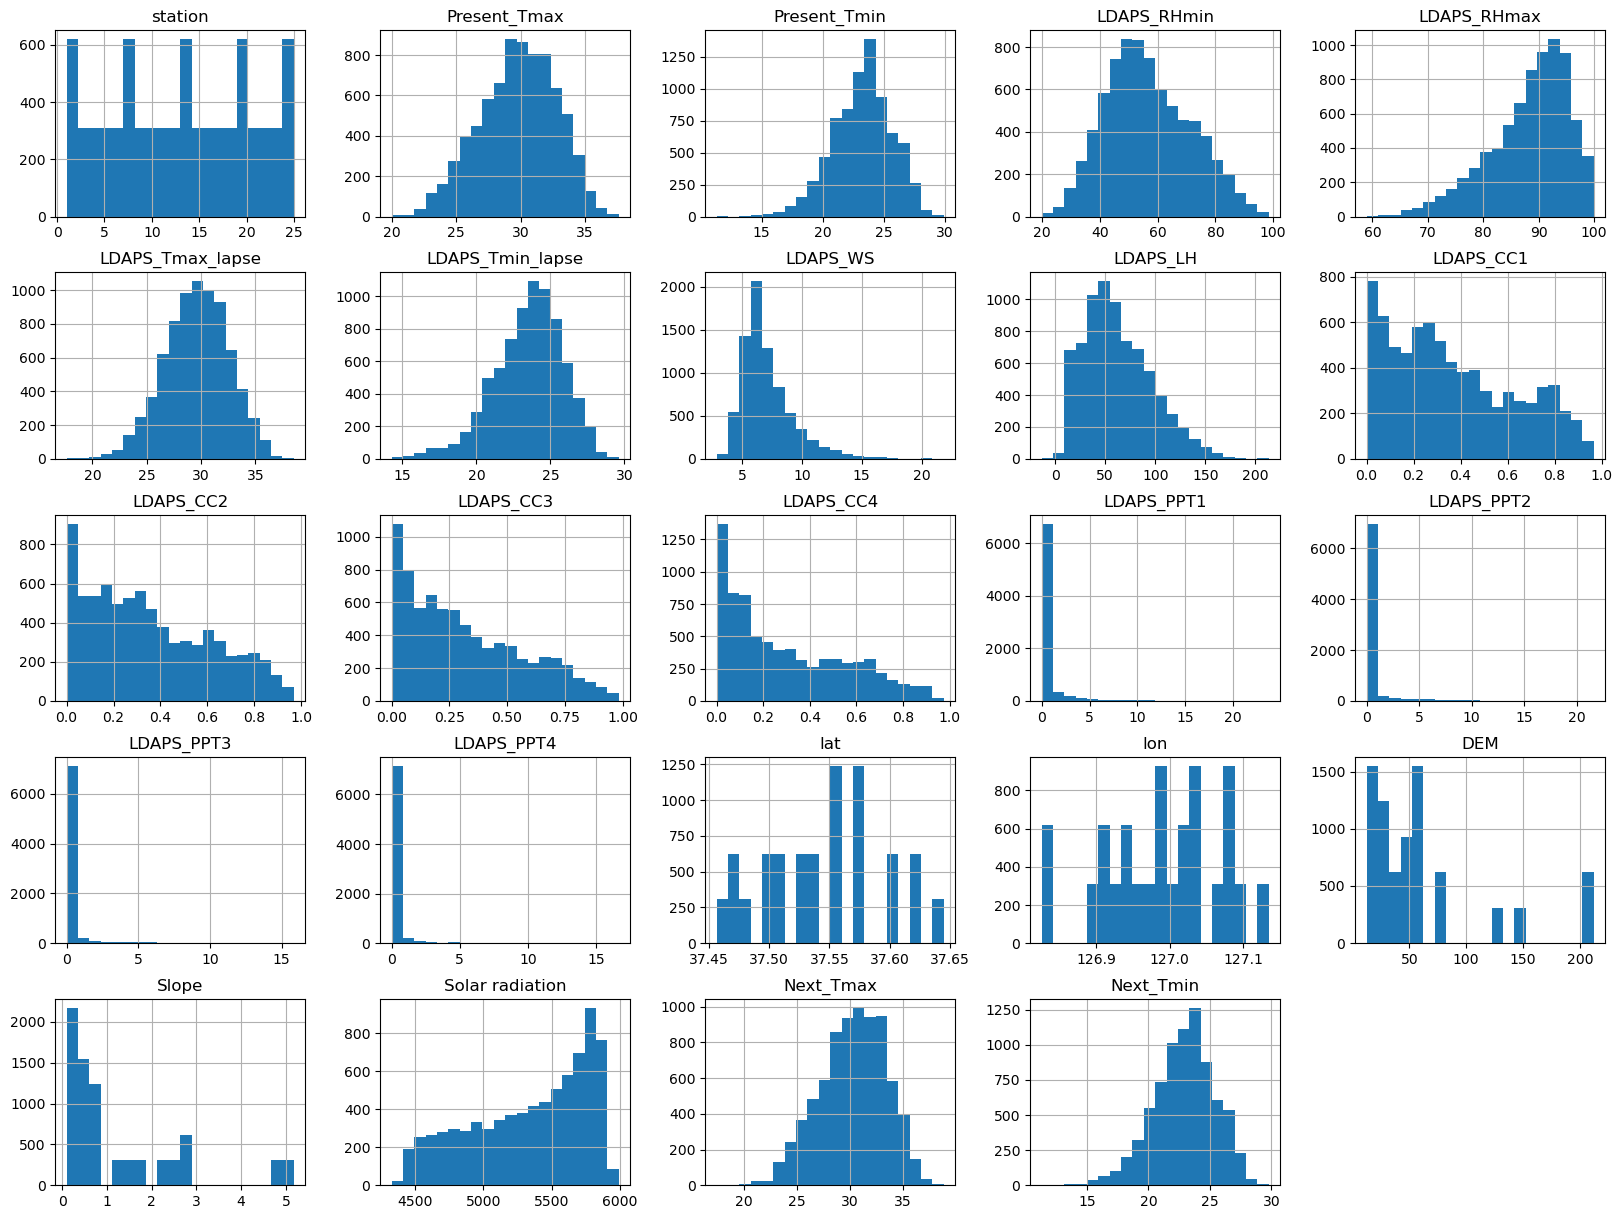

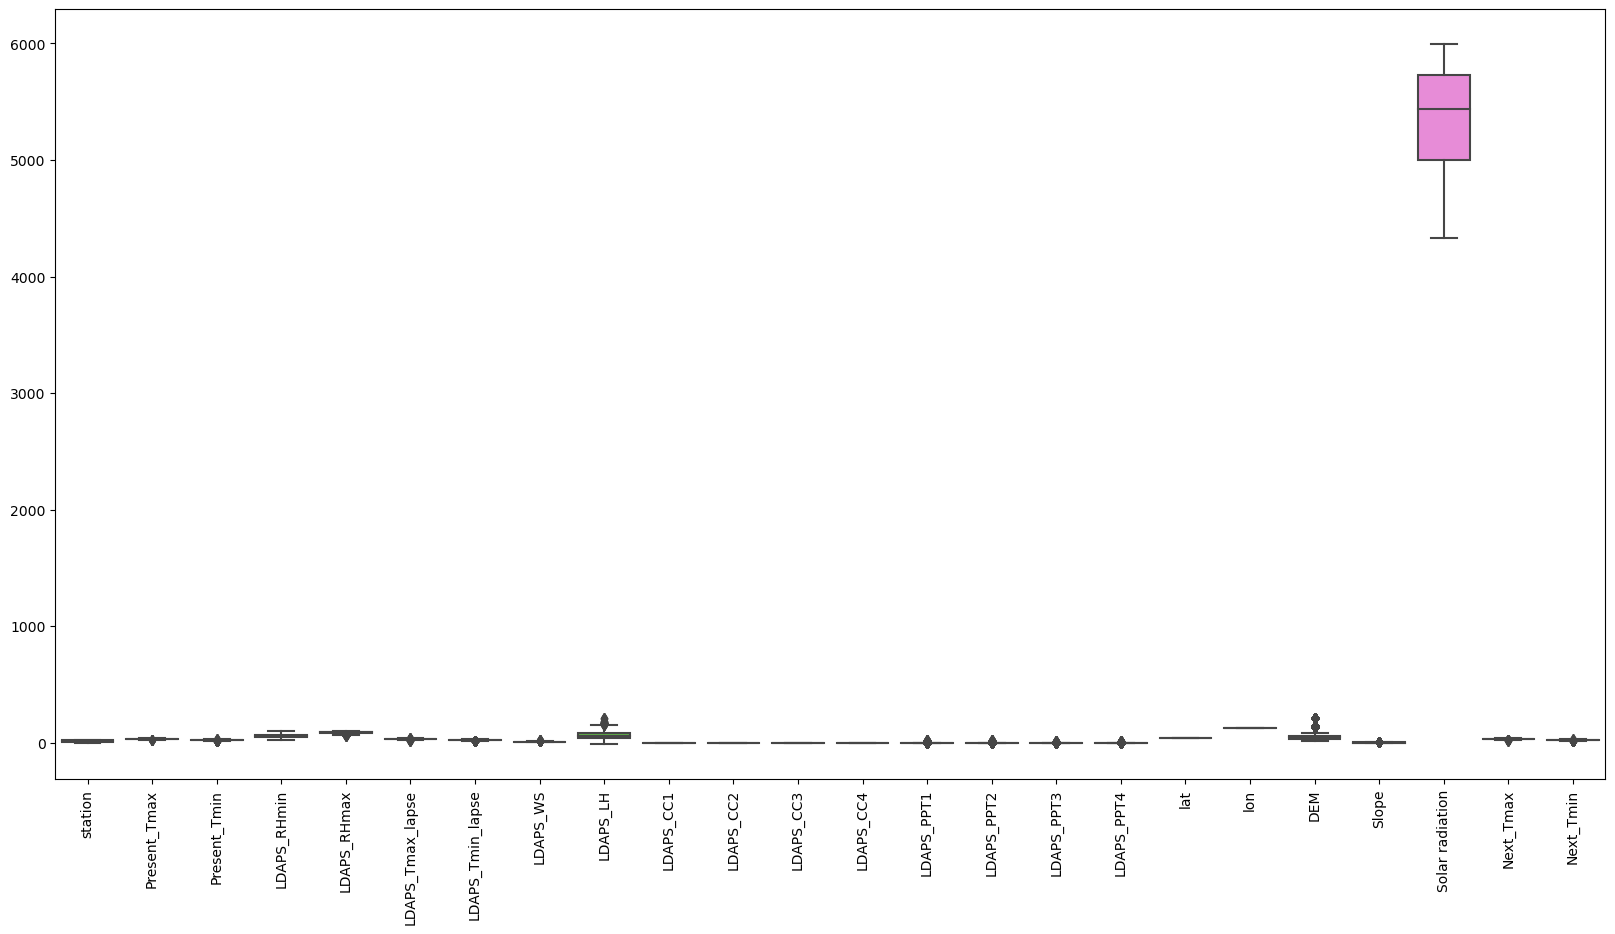

C:\Users\abhij\AppData\Local\Temp\ipykernel_10252\3284528968.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


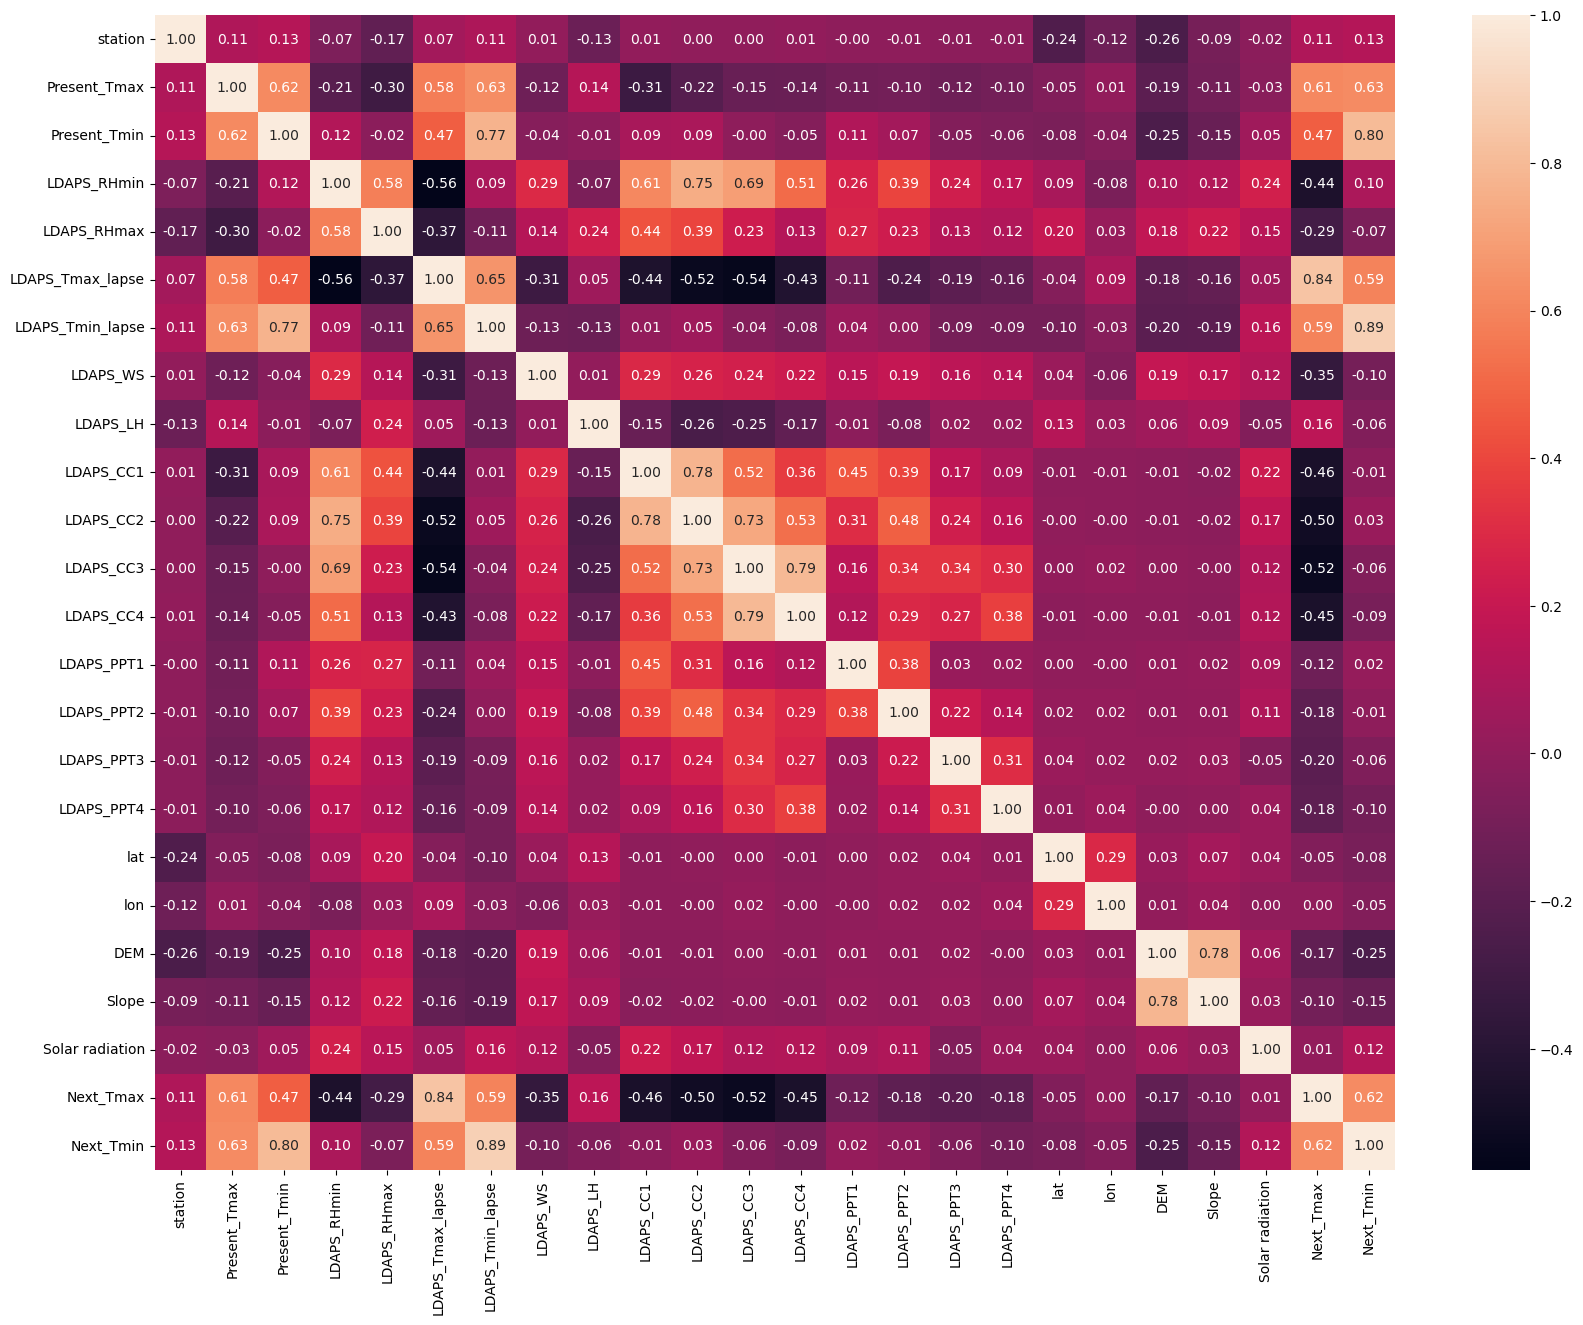

In [16]:
selected_columns = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'Next_Tmax', 'Next_Tmin']
sns.pairplot(df[selected_columns])
plt.show()

df.hist(bins=20, figsize=(20, 15))
plt.show()

plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()


In [17]:
df = df.dropna()

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop(['Date'], axis=1)

df = pd.get_dummies(df, columns=['station'], drop_first=True)


C:\Users\abhij\AppData\Local\Temp\ipykernel_10252\1900685312.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = df['Next_Tmax']
y_min = df['Next_Tmin']

X_train, X_test, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train, X_test, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)


In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[model_name] = {
            'MSE': mean_squared_error(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R2': r2_score(y_test, y_pred)
        }
    return results

results_max = evaluate_models(X_train, X_test, y_train_max, y_test_max, models)
print(results_max)

results_min = evaluate_models(X_train, X_test, y_train_min, y_test_min, models)
print(results_min)


{'Linear Regression': {'MSE': 1.9617367714167515, 'MAE': 1.0575094562725393, 'R2': 0.7916916557928876}, 'Random Forest': {'MSE': 0.8861866837944657, 'MAE': 0.6924519104084317, 'R2': 0.9058996683707466}, 'SVR': {'MSE': 8.887736017515339, 'MAE': 2.3893817325727285, 'R2': 0.05624974740037325}}
{'Linear Regression': {'MSE': 0.8344695562410582, 'MAE': 0.7174922078084562, 'R2': 0.8641633284118826}, 'Random Forest': {'MSE': 0.5681469841897232, 'MAE': 0.5697588932806325, 'R2': 0.9075158647455023}, 'SVR': {'MSE': 5.353160681794885, 'MAE': 1.8411520446618073, 'R2': 0.1286014881514307}}


In [20]:
best_model_max_name = min(results_max, key=lambda x: results_max[x]['MSE'])
best_model_min_name = min(results_min, key=lambda x: results_min[x]['MSE'])

best_model_max = models[best_model_max_name]
best_model_min = models[best_model_min_name]


In [21]:
param_grid = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

if best_model_max_name in param_grid:
    best_model_max = hyperparameter_tuning(best_model_max, param_grid[best_model_max_name], X_train, y_train_max)
if best_model_min_name in param_grid:
    best_model_min = hyperparameter_tuning(best_model_min, param_grid[best_model_min_name], X_train, y_train_min)


In [22]:
y_pred_max = best_model_max.predict(X_test)
y_pred_min = best_model_min.predict(X_test)

final_results_max = {
    'MSE': mean_squared_error(y_test_max, y_pred_max),
    'MAE': mean_absolute_error(y_test_max, y_pred_max),
    'R2': r2_score(y_test_max, y_pred_max)
}

final_results_min = {
    'MSE': mean_squared_error(y_test_min, y_pred_min),
    'MAE': mean_absolute_error(y_test_min, y_pred_min),
    'R2': r2_score(y_test_min, y_pred_min)
}

print('Final Results for Tmax Prediction:', final_results_max)
print('Final Results for Tmin Prediction:', final_results_min)

joblib.dump(best_model_max, 'best_model_max.pkl')
joblib.dump(best_model_min, 'best_model_min.pkl')


Final Results for Tmax Prediction: {'MSE': 0.8933420648880094, 'MAE': 0.6986607378129114, 'R2': 0.905139869395938}
Final Results for Tmin Prediction: {'MSE': 0.5721645100587874, 'MAE': 0.5704813582753785, 'R2': 0.9068618836170221}


['best_model_min.pkl']

In [ ]:
# Temperature Forecast Project using ML

## Introduction
This project focuses on bias correction of next-day maximum and minimum air temperatures forecasted by the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. The dataset includes summer data from 2013 to 2017, consisting of various weather-related attributes and geographic auxiliary variables. The objective is to build separate models to predict the next-day maximum and minimum air temperatures.

## Data Overview
- **Number of samples**: X 
- **Number of features**: 25
- **Features**: station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation
- **Target Variables**: Next_Tmax, Next_Tmin

## Methodology

### 1. Data Import and Libraries
- Imported necessary libraries and loaded the dataset.

### 2. Exploratory Data Analysis (EDA)
- Checked for missing values and data types.
- Generated summary statistics.
- Visualized distributions and relationships between features and target variables using pair plots and histograms.
- Analyzed correlations using a heatmap.

### 3. Data Preprocessing and Feature Engineering
- Dropped rows with missing values.
- Converted 'Date' to datetime format and extracted additional features like year, month, and day.
- Encoded categorical variables (e.g., station).
- Split data into features (X) and targets (y), followed by training and testing sets for both Tmax and Tmin predictions.

### 4. Model Building and Evaluation
- Defined multiple models: Linear Regression, Random Forest, and SVR.
- Trained and evaluated models using MSE, MAE, and R² metrics.
- Selected the best model based on evaluation metrics.

### 5. Hyperparameter Tuning and Model Selection
- Performed hyperparameter tuning for the best models using GridSearchCV.
- Selected the best hyperparameters and evaluated the final models.

## Findings

- **Best performing model for Next_Tmax prediction**: Tuned Random Forest Regressor
  - **MSE**: X ( 0.8933420648880094)
  - **MAE**: Y (0.6986607378129114)
  - **R²**: Z ( 0.905139869395938)
  
- **Best performing model for Next_Tmin prediction**: Tuned Random Forest Regressor
  - **MSE**: X (0.5721645100587874)
  - **MAE**: Y (0.5704813582753785)
  - **R²**: Z (0.9068618836170221)

## Conclusion
The Tuned Random Forest models provided the best performance for
predicting both next-day maximum and minimum temperatures based on the evaluation metrics.
These models were chosen as the final models for temperature forecasting.

## Future Work
Further improvements can be made by exploring additional features,
experimenting with other machine learning algorithms
,and fine-tuning the hyperparameters more extensively.

